In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, f_oneway, chi2_contingency, kruskal, mannwhitneyu, ttest_ind

%matplotlib inline

In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
processed_data_dir = os.path.join(parent_dir, 'data', 'processed')

In [3]:
df = pd.read_csv(os.path.join(processed_data_dir, 'insurance_feature_engineered_for_eda.csv'))

In [4]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,MajorSurgeryDone,BMI,BMI_Category,Age_Category
0,45,0,0,0,0,155,57,0,0,0,25000,0,23.725286,Normal weight,Middle Aged Adults
1,60,1,0,0,0,180,73,0,0,0,29000,0,22.530864,Normal weight,Senior
2,36,1,1,0,0,158,59,0,0,1,23000,1,23.634033,Normal weight,Adult
3,52,1,1,0,1,183,93,0,0,2,28000,1,27.770313,Overweight,Middle Aged Adults
4,38,0,0,0,1,166,88,0,0,1,23000,1,31.934969,Obesity Class 1,Adult


In [5]:
df.shape

(986, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      986 non-null    int64  
 1   Diabetes                 986 non-null    int64  
 2   BloodPressureProblems    986 non-null    int64  
 3   AnyTransplants           986 non-null    int64  
 4   AnyChronicDiseases       986 non-null    int64  
 5   Height                   986 non-null    int64  
 6   Weight                   986 non-null    int64  
 7   KnownAllergies           986 non-null    int64  
 8   HistoryOfCancerInFamily  986 non-null    int64  
 9   NumberOfMajorSurgeries   986 non-null    int64  
 10  PremiumPrice             986 non-null    int64  
 11  MajorSurgeryDone         986 non-null    int64  
 12  BMI                      986 non-null    float64
 13  BMI_Category             986 non-null    object 
 14  Age_Category             9

In [7]:
df.isna().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
MajorSurgeryDone           0
BMI                        0
BMI_Category               0
Age_Category               0
dtype: int64

In [8]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,MajorSurgeryDone,BMI
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996,0.514199,27.460709
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382,0.500052,5.878671
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000,0.000000,15.156281
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000,0.000000,23.393392
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000,1.000000,27.156602
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000,1.000000,30.759870
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000,1.000000,50.000000


In [9]:
def cm_to_feet_inches(cm):
    inches = cm / 2.54
    feet = int(inches // 12)
    inches = inches % 12
    return f"{feet}ft {int(inches)}in"

In [10]:
cm_to_feet_inches(df['Height'].quantile(0.75))

'5ft 9in'

In [11]:
cm_to_feet_inches(df['Height'].min()), cm_to_feet_inches(df['Height'].max())

('4ft 9in', '6ft 2in')

In [12]:
print('Unique values for Diabetes column:', list(df['Diabetes'].unique()))
print('Unique values for BloodPressureProblems columns:', list(df['BloodPressureProblems'].unique()))
print('Unique values for AnyTransplants column:', list(df['AnyTransplants'].unique()))
print('Unique values for AnyChronicDiseases column:', list(df['AnyChronicDiseases'].unique()))
print('Unique values for KnownAllergies column:', list(df['KnownAllergies'].unique()))
print('Unique values for HistoryOfCancerInFamily column:', list(df['HistoryOfCancerInFamily'].unique()))
print('Unique values for NumberOfMajorSurgeries column:', list(df['NumberOfMajorSurgeries'].unique()))

Unique values for Diabetes column: [0, 1]
Unique values for BloodPressureProblems columns: [0, 1]
Unique values for AnyTransplants column: [0, 1]
Unique values for AnyChronicDiseases column: [0, 1]
Unique values for KnownAllergies column: [0, 1]
Unique values for HistoryOfCancerInFamily column: [0, 1]
Unique values for NumberOfMajorSurgeries column: [0, 1, 2, 3]


**Observations:**
- There are 986 records, with 11 features
- No missing values
- All fields are numerical
- Average age is 42 years
- Minimum age is 18 and max age is 66
- Average height is 168 cm 
- Average weight is 76 kg
- Average premium price is &#8377; 24,337
- Minimum premium price is &#8377; 15,000 and max is &#8377; 40,000
- Around 40% of the population has Diabetes and Blood Pressure condition
- Approx 20% of the population has allergies
- Around 18% of the population has chronic disease
- 10% of the population has history of cancer in family
- 5% of the population has undergone a transplant
- Mean and Median of Age, Height, Weight and PremiumPrice are almost equal
- The data suggest symmetry for Age, Height, Weight column 
- It also suggest that the data is not heavily skewed
- We can also infer that there are no to few outliers
- Only 25% of the policy holders are below 30 years old
- 75% of the policy holders having age below 53 years old
- Max height of the policy holder is 6ft 2in, while 75% of the populations height is below 5ft 9in
- Max weight of the policy holder is 132kg, while 75% of the policy holders weight is below 87kg, this also suggest some outlier in the data, further analysis needs to be performed
- Similarly for Premium Price, 75% of the population is paying &#8377; 28,000, whereas the max premium paid is &#8377; 40,000, suggesting there may be some outliers
- Premium paid by 25%, 50% and 75% of the policy holders is comparable, while max is too high
- Likewise, policy holders below 25% has not gone through any major surgeries.
- We can also observe that from 25% to 75% of the policy holders have undergone only 1 major surgeries, while max surgeries done is 3


# Univariate Analysis

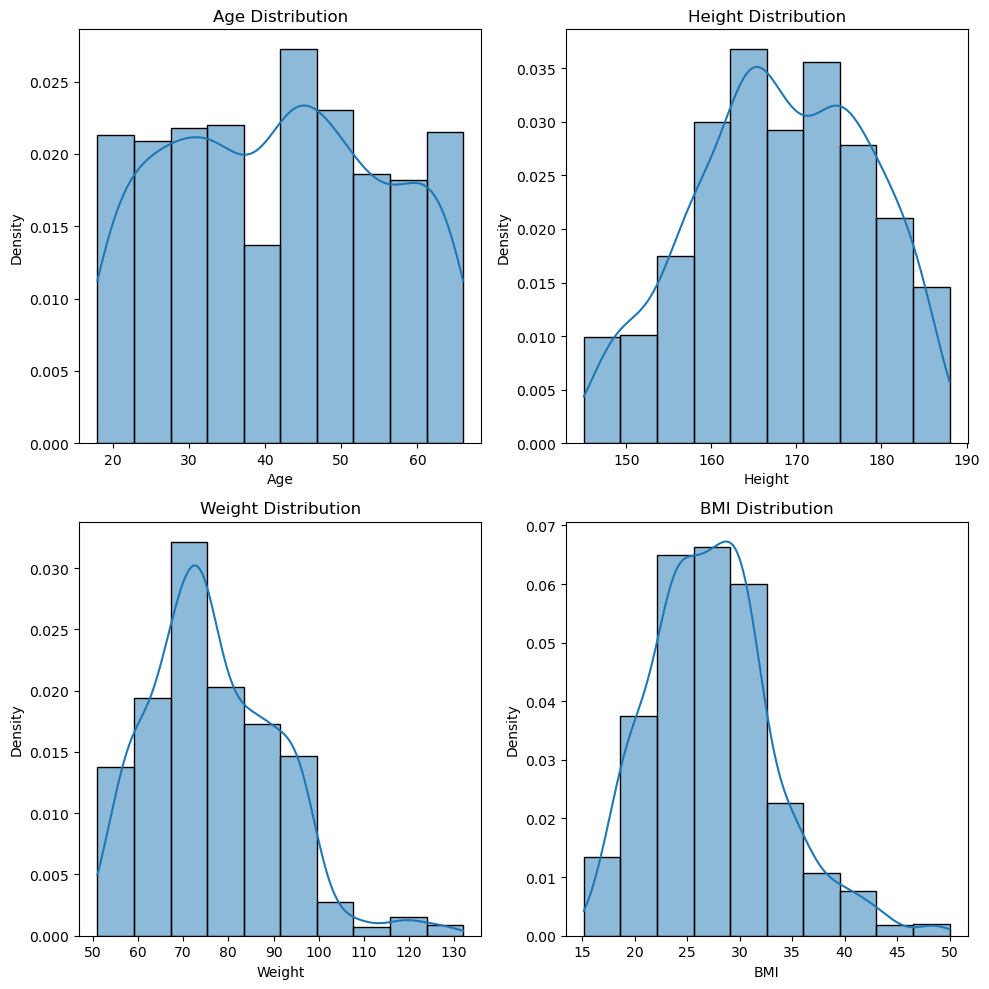

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax = ax.flatten()

sns.histplot(df['Age'], bins=10, stat='density', kde=True, ax=ax[0])
ax[0].set_title('Age Distribution')

sns.histplot(df['Height'], bins=10, stat='density', kde=True, ax=ax[1])
ax[1].set_title('Height Distribution')

sns.histplot(df['Weight'], bins=10, stat='density', kde=True, ax=ax[2])
ax[2].set_title('Weight Distribution')

sns.histplot(df['BMI'], bins=10, stat='density', kde=True, ax=ax[3])
ax[3].set_title('BMI Distribution')

plt.tight_layout()
plt.show()

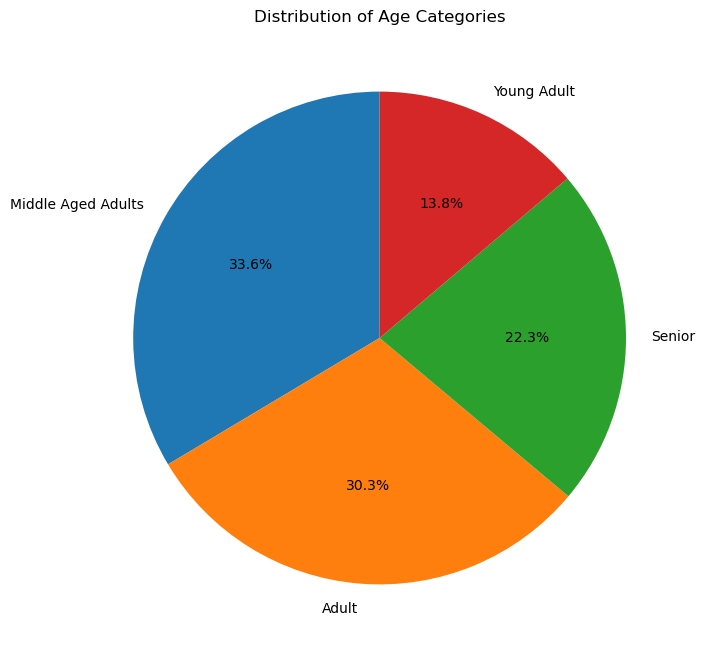

In [14]:
age_category_counts = df['Age_Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(age_category_counts, labels=age_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age Categories')
plt.show()

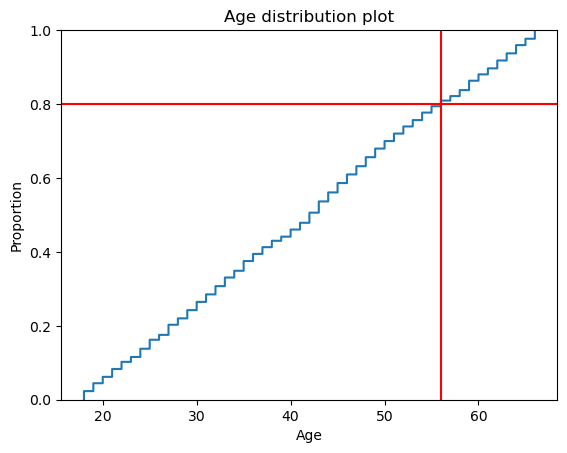

In [15]:
sns.ecdfplot(data=df, x='Age')

plt.axhline(y=0.8, color='red')
plt.axvline(x=56, color='red')
plt.title('Age distribution plot')
plt.show()

**Observations:**
- There is less awareness among Young Adults (18-24) regarding insurance as they seems to be minority in the data set
- Adults including middle aged adults are more aware of insaurance and have higher chances of buying it.
- Senior citizens shows less interest in purchasing insurance, it could be because of below reasons:
    - Senior citizens may face higher insurance premiums due to their age, which can be a significant financial burden
    - Many senior citizens have pre-existing medical conditions, which can make it difficult to obtain insurance coverage or result in higher premiums.
    - Some insurance plans may not offer comprehensive coverage for senior citizens, leaving them with limited options for medical care and expenses.
    - Many insurance policies have waiting periods for certain medical conditions, which can be stressful for senior citizens who may need immediate medical attention.
    - Most health insurance plans for senior citizens do not cover dental problems.
    - Insurance plans may not provide adequate coverage for long-term care, such as nursing home care, assisted living, or home care.
    - Senior citizens may find it challenging to understand their insurance benefits, including what is covered and what is not, which can lead to delays or denials of claims.

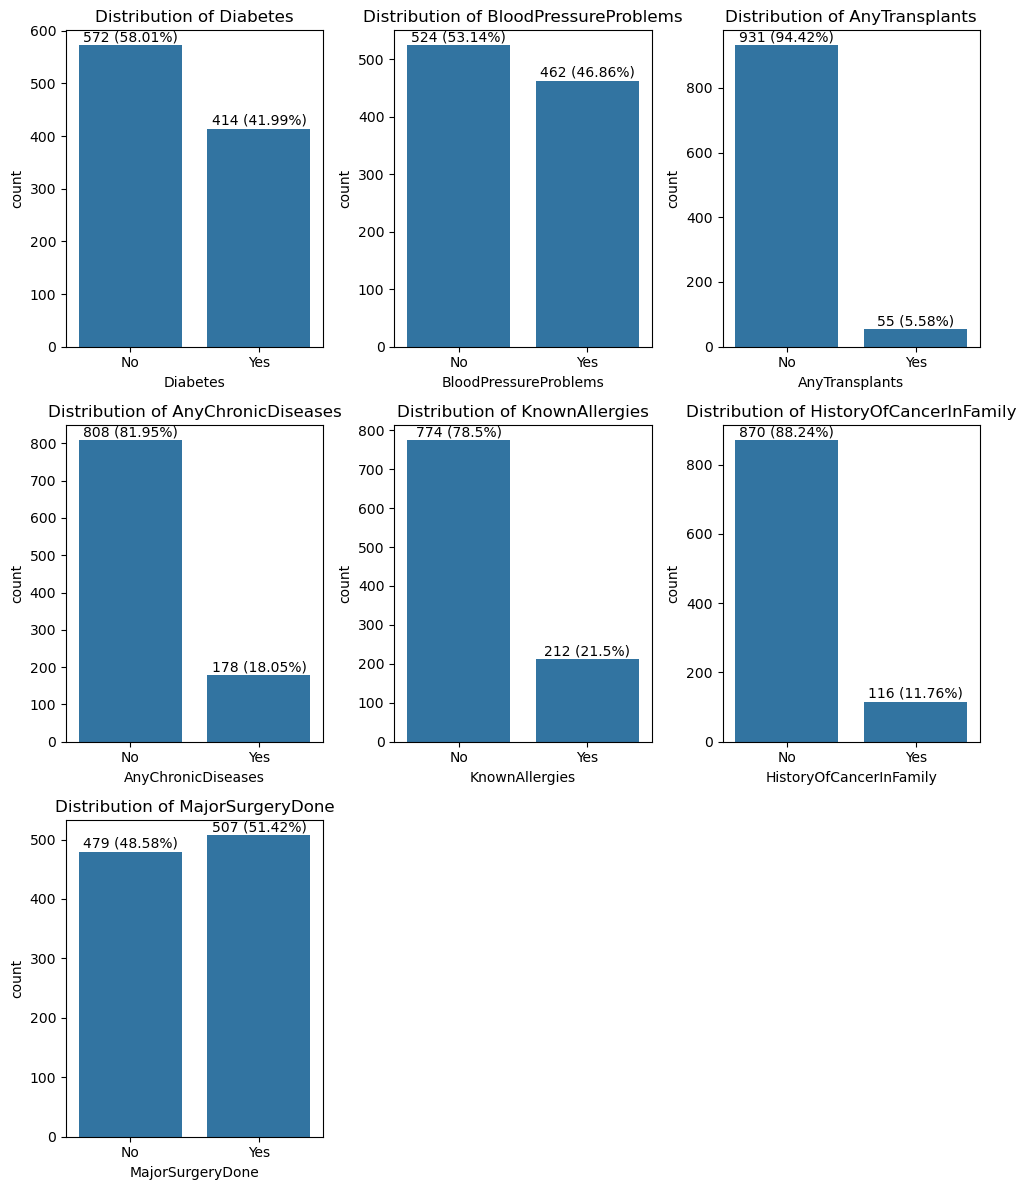

In [16]:
columns = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'MajorSurgeryDone']

fig, ax = plt.subplots(3, 3, figsize=(10, 12))

ax = ax.flatten()

for i, col in enumerate(columns):
    value_counts = df[col].value_counts()

    sns.barplot(x=value_counts.index, y=value_counts, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xticks([0, 1])
    ax[i].set_xticklabels(['No', 'Yes'], rotation=0)

    for index in value_counts.index:
        value = value_counts[index]
        total_count = sum(value_counts)
        percentage = round((value / total_count) * 100, 2)
        ax[i].text(index, value + 2, str(value) + f' ({percentage}%)', ha='center', va='bottom')

ax[7].axis('off')
ax[8].axis('off')

plt.tight_layout()
plt.show()

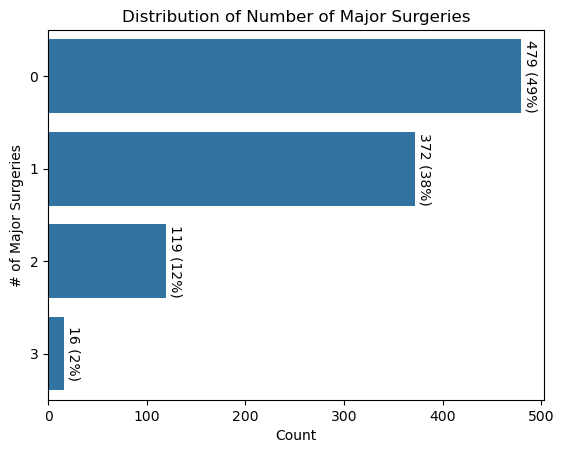

In [17]:
sns.countplot(data=df, y='NumberOfMajorSurgeries')
plt.title('Distribution of Number of Major Surgeries')
plt.xlabel('Count')
plt.ylabel('# of Major Surgeries')

for index, value in enumerate(df['NumberOfMajorSurgeries'].value_counts()):
    total_count = sum(value_counts)
    percentage = round((value / total_count) * 100)
    plt.text(value + 10, index, str(value) + f' ({percentage}%)', ha='center', va='center', rotation=-90)

plt.show()

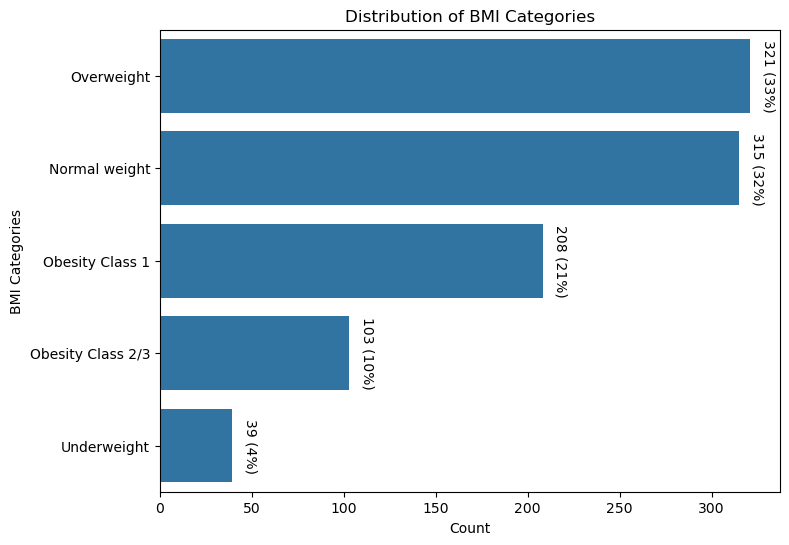

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='BMI_Category', order=df['BMI_Category'].value_counts().sort_values(ascending=False).index)
plt.title('Distribution of BMI Categories')
plt.xlabel('Count')
plt.ylabel('BMI Categories')

for index, value in enumerate(df['BMI_Category'].value_counts()):
    total_count = sum(value_counts)
    percentage = round((value / total_count) * 100)
    plt.text(value + 10, index, str(value) + f' ({percentage}%)', ha='center', va='center', rotation=-90)

plt.show()

**Observations:**
- 42% of the policy holder have diabetes
- 47% of the policy holder have Blood Pressure problems
- We can say that the distribution of individuals with and without diabetes and blood pressure problems is approximately equal.
- Based on the data, the number of policy holders who have undergone major surgeries is similar to those who have not. Additionally, the majority of policy holders who have undergone surgery have had only one procedure (i.e. around 38% of total policy holders has undergone one procedure).
- Other conditions, such as a history of transplants, cancer in the family, known allergies, and chronic diseases, are less common among policy holders compared to diabetes and hypertension.
- Thirty-two percent of policy holders have a normal weight, while the remainder are either underweight or overweight. Of those, 33% are classified as overweight, 21% as Class 1 obese, and 10% fall into the Class 2/3 obesity category.
- Naturally, BMI is slightly right skewed due to overweight and obese policy holders.
- Fifty percent of policy holders have acquired coverage due to an existing health condition, while the remaining fifty percent are proactive individuals who prioritize their health and secure their future financial well-being through insurance.

In [19]:
print("Age skewness:", round(df['Age'].skew(), 2))
print("Age kurtosis:", round(df['Age'].kurt(), 2))

Age skewness: 0.03
Age kurtosis: -1.13


In [20]:
print("Weight skewness:", round(df['Weight'].skew(), 2))
print("Weight kurtosis:", round(df['Weight'].kurt(), 2))

Weight skewness: 0.67
Weight kurtosis: 0.61


In [21]:
print("Height skewness:", round(df['Height'].skew(), 2))
print("Height kurtosis:", round(df['Height'].kurt(), 2))

Height skewness: -0.18
Height kurtosis: -0.76


**Observations:**
- Age, height, and weight all have a platykurtic distribution, meaning there aren't many outliers, if any.
- For age, the skewness is 0.03, which means the data is almost perfectly normal, with just a slight lean to the right.
- For height, the skewness is -0.18 and the kurtosis is -0.76, showing a bit of a left skew.
- For weight, the skewness is 0.67 and the kurtosis is 0.61, indicating a noticeable right skew.

# Bivariate Analysis

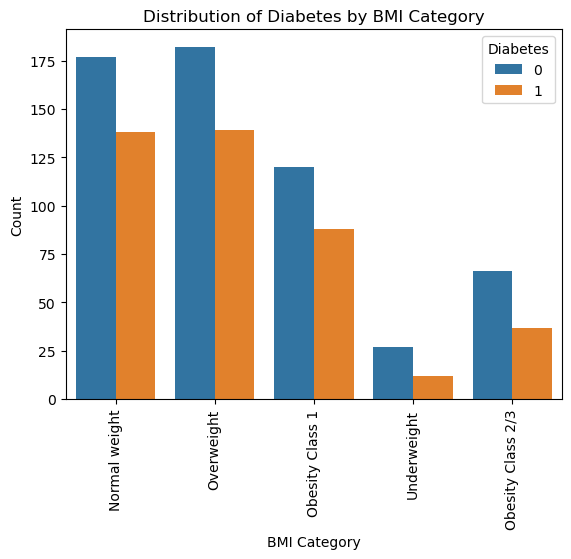

In [22]:
sns.countplot(data=df, x='BMI_Category', hue='Diabetes')
plt.xticks(rotation=90)
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Distribution of Diabetes by BMI Category')
plt.show()

In [23]:
round(df.groupby('BMI_Category', observed=False)['Diabetes'].value_counts(normalize=True), 2).reset_index()

,BMI_Category,Diabetes,proportion
0,Normal weight,0,0.56
1,Normal weight,1,0.44
2,Obesity Class 1,0,0.58
3,Obesity Class 1,1,0.42
4,Obesity Class 2/3,0,0.64
5,Obesity Class 2/3,1,0.36
6,Overweight,0,0.57
7,Overweight,1,0.43
8,Underweight,0,0.69
9,Underweight,1,0.31


**Observation:** About 42% of policyholders have diabetes, which is just under half. If we break it down by BMI category, we see a similar trend—people with diabetes are pretty much on par with those without it across all categories, though there are slightly fewer with diabetes overall.

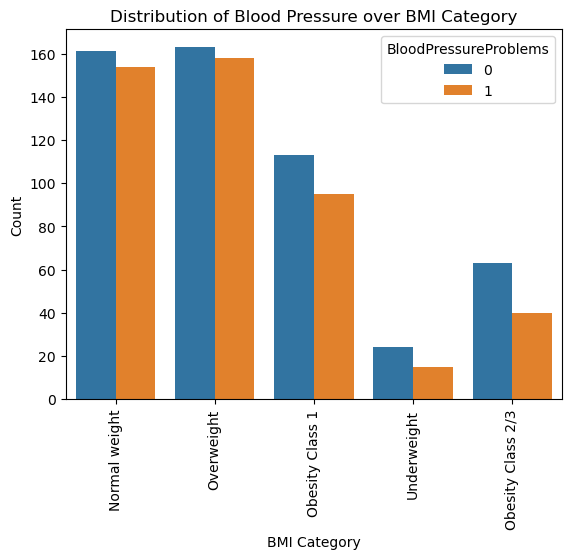

In [24]:
sns.countplot(data=df, x='BMI_Category', hue='BloodPressureProblems')
plt.xticks(rotation=90)
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Distribution of Blood Pressure over BMI Category')
plt.show()

**Observation:** Similar to diabetes, when we look at blood pressure issues across different BMI categories, we see a pretty similar trend. The proportion of policy holders with or without blood pressure problems is almost the same, but there’s a slight edge for those who don’t have any blood pressure issues in all categories.

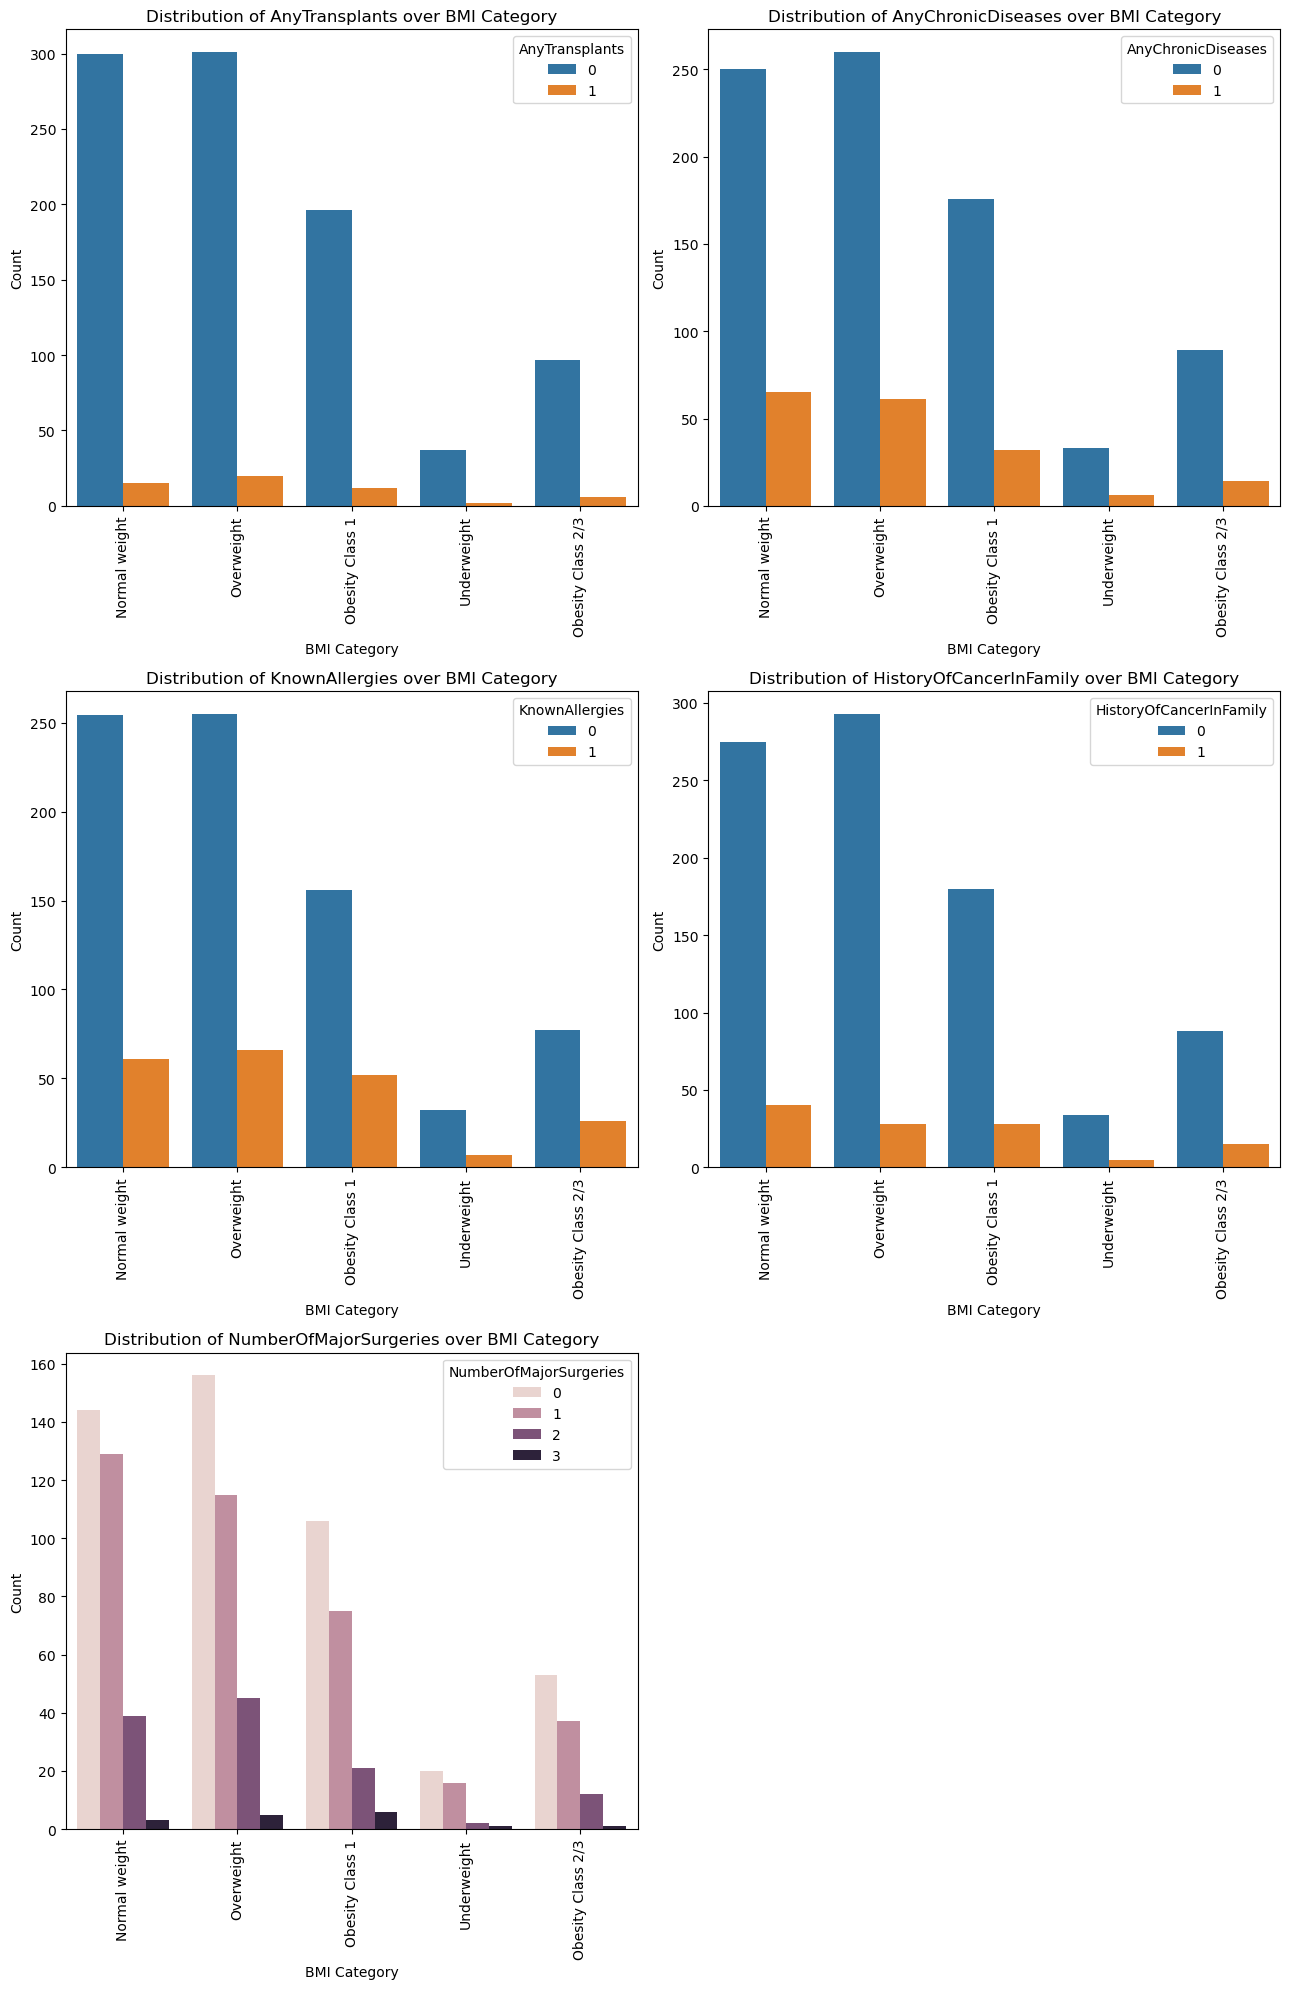

In [25]:
fig, ax = plt.subplots(3, 2, figsize=(13, 20))

ax = ax.flatten()
columns = ['AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

for index, col in enumerate(columns):
    sns.countplot(data=df, x='BMI_Category', hue=col, ax=ax[index])
    plt.setp(ax[index].xaxis.get_majorticklabels(), rotation=90)
    ax[index].set_xlabel('BMI Category')
    ax[index].set_ylabel('Count')
    ax[index].set_title(f'Distribution of {col} over BMI Category')

ax[5].axis('off')
plt.tight_layout()    
plt.show()

**Observations:**  
- Policy holders who are underweight tend to have fewer health issues related to transplants, allergies, chronic diseases, or major surgeries.  
- Across all BMI categories, these health problems show up at similar rates as we saw in univariate analysis, meaning they’re less common for everyone.

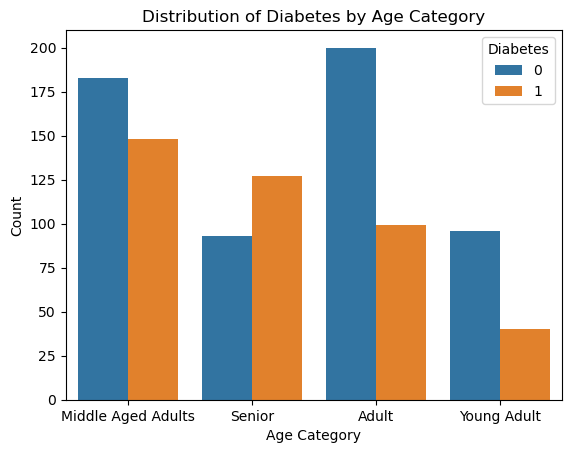

In [26]:
sns.countplot(data=df, x='Age_Category', hue='Diabetes')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Diabetes by Age Category')
plt.show()

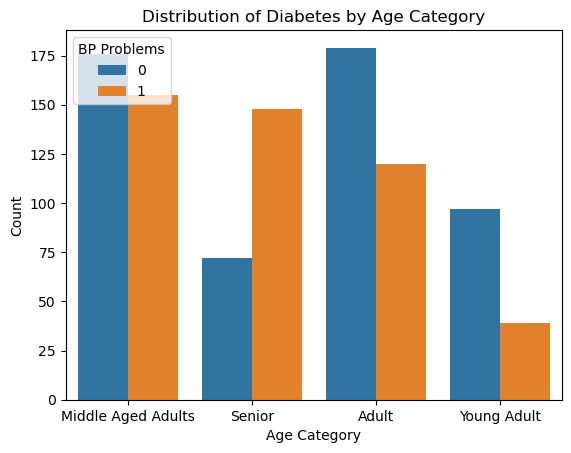

In [27]:
sns.countplot(data=df, x='Age_Category', hue='BloodPressureProblems')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Diabetes by Age Category')
plt.legend(loc='upper left', title='BP Problems', frameon=True)
plt.show()

**Observation:** In Seniors, the number of diabetic and blood pressure problem individuals is higher than the non-diabetic and blood pressure problem individuals, suggesting that diabetes and blood pressure problem prevalence increases significantly in older age.

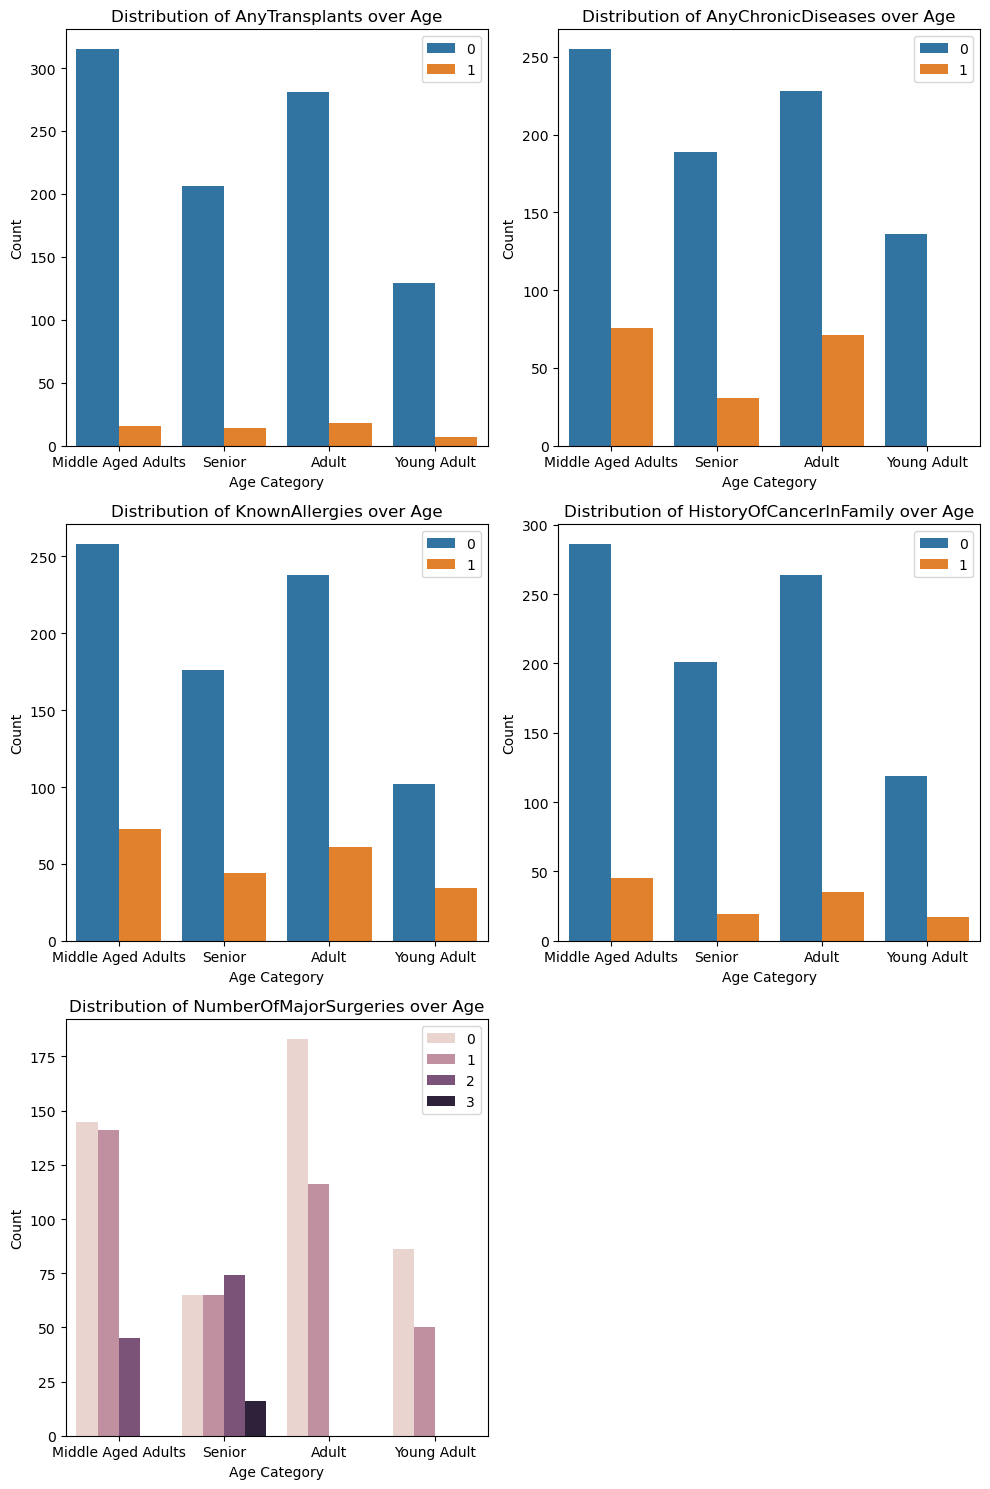

In [28]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))

ax = ax.flatten()
columns = ['AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

for index, col in enumerate(columns):
    sns.countplot(data=df, x='Age_Category', hue=col, ax=ax[index])
    ax[index].set_xlabel('Age Category')
    ax[index].set_ylabel('Count')
    ax[index].set_title(f'Distribution of {col} over Age')
    ax[index].legend(loc='upper right', frameon=True)

ax[5].axis('off')
plt.tight_layout()    
plt.show()

**Observations:**  
- People between the ages of 18 and 25 don’t seem to have any chronic conditions.  
- Adults in middle age and older folks have had the most major surgeries.

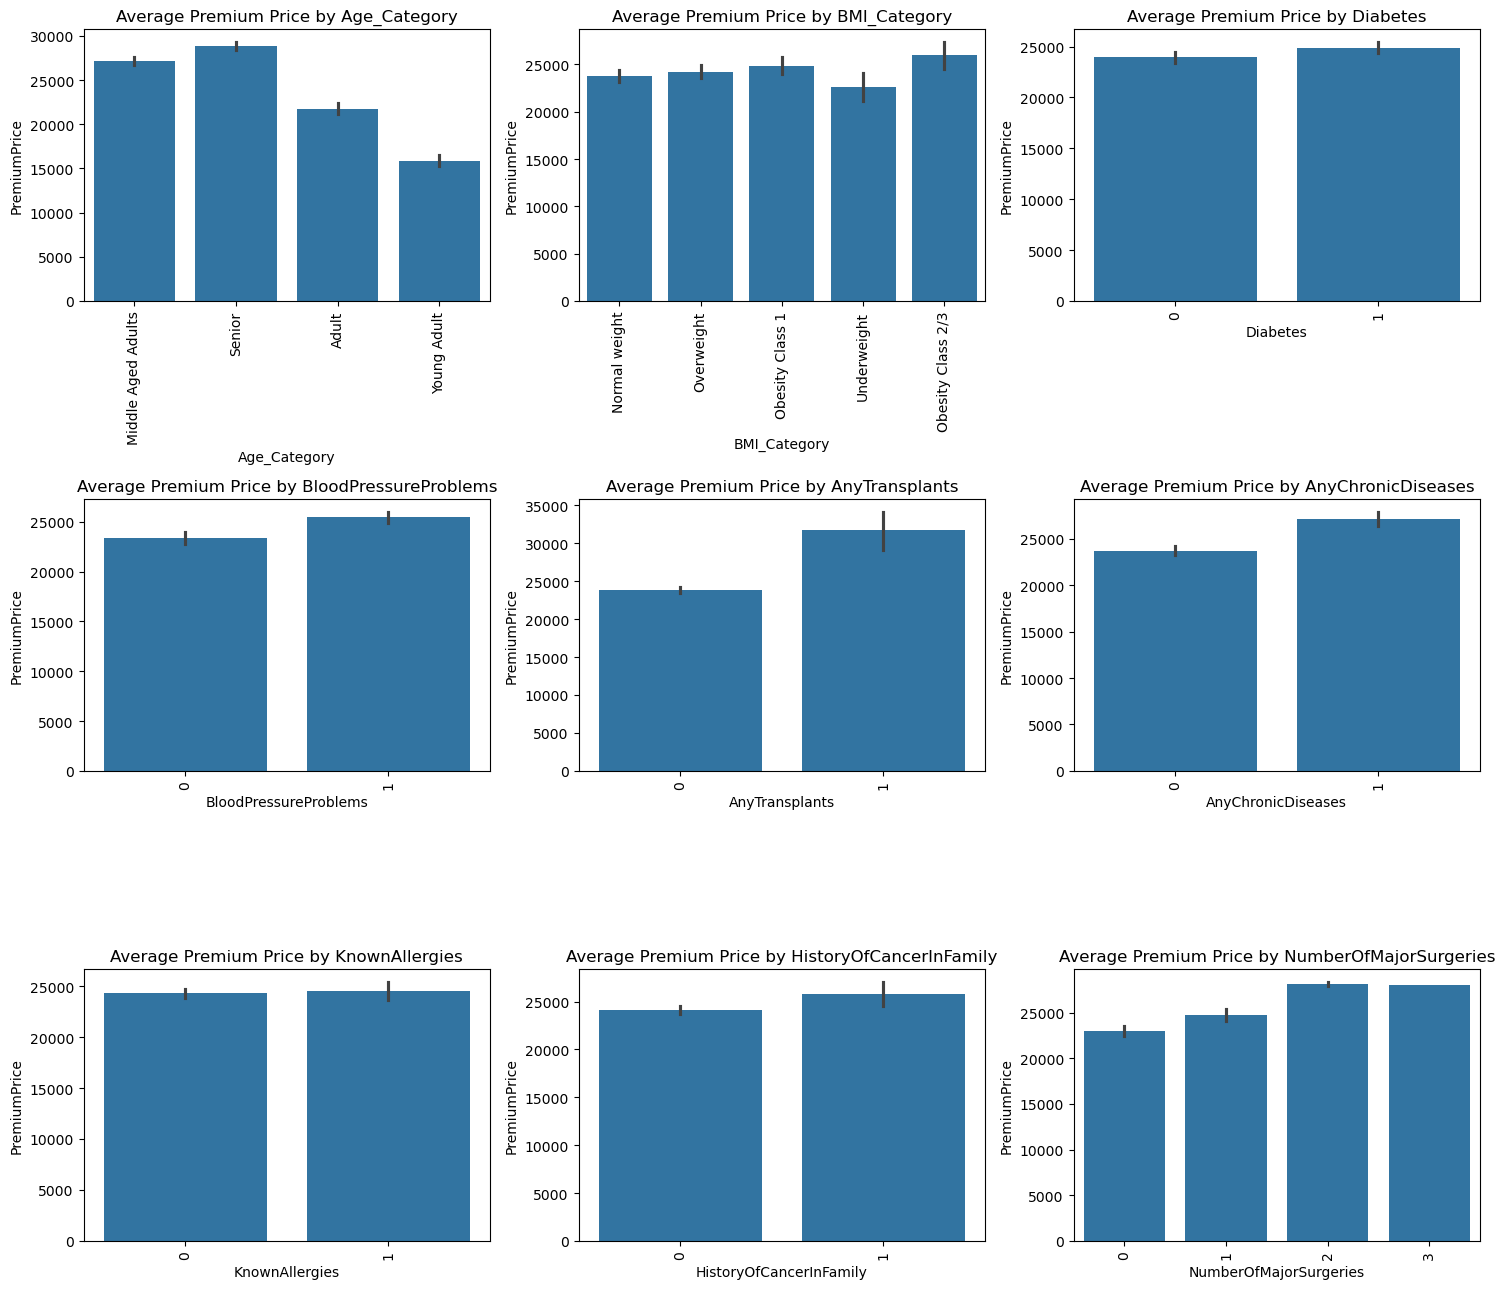

In [29]:
columns = ['Age_Category', 'BMI_Category', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

fig, ax = plt.subplots(3, 3, figsize=(15, 13))

ax = ax.flatten()

for i, col in enumerate(columns):
    sns.barplot(data=df, x=col, y='PremiumPrice', ax=ax[i])
    plt.setp(ax[i].xaxis.get_majorticklabels(), rotation=90)
    ax[i].set_title(f'Average Premium Price by {col}')

plt.tight_layout()        
plt.show()
    

**Observations:**
- As people get older, the premium price tends to go up.
- Premiums also rise, but not by a huge amount, as BMI increases – so overweight and obese individuals usually pay more.
- For conditions like diabetes, high blood pressure, allergies, and a family history of cancer, the premium prices stay pretty much the same. This might be because these conditions are quite common.
- Policyholders with chronic diseases or who’ve had transplants tend to pay higher premiums.
- It looks like there's a big difference in the premium amounts for policyholders with 0, 1, and 2-3 surgeries. However, the amount paid by individuals who had 2 or 3 surgeries doesn't seem to be that significant. We can check it further while performing hypothesis testing

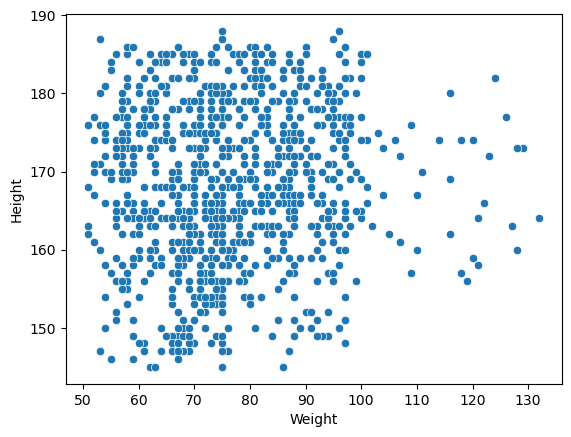

In [30]:
sns.scatterplot(data=df, x='Weight', y='Height')
plt.show()

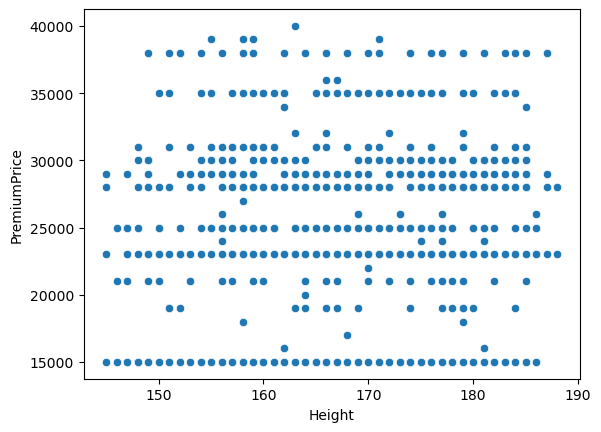

In [31]:
sns.scatterplot(data=df, x='Height', y='PremiumPrice')
plt.show()

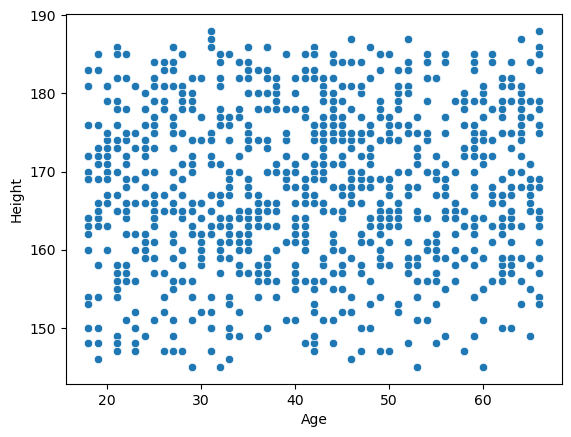

In [32]:
sns.scatterplot(data=df, x='Age', y='Height')
plt.show()

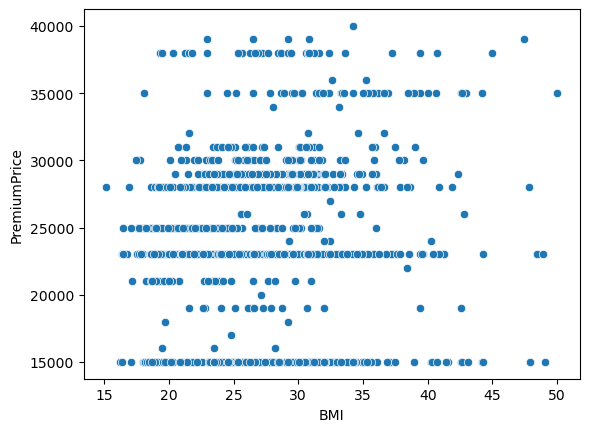

In [33]:
sns.scatterplot(data=df, x='BMI', y='PremiumPrice')
plt.show()

**Observation:** There is no correlation found in the data

In [34]:
def conditional_probability(df, condition_col, condition_val, target_col, target_val):
    """
    Calculate the conditional probability P(target_col = target_val | condition_col = condition_val)

    Args:
    ---
    
    df: pandas DataFrame
    condition_col: str, the column name for the condition i.e the even has already happened
    condition_val: value, the value for the condition
    target_col: str, the column name for the target
    target_val: value, the value for the target

    Returns:
    ---
    
    float, the conditional probability
    """
    # Subset the dataframe based on the condition
    condition_subset = df[df[condition_col] == condition_val]
    
    # Calculate the conditional probability
    conditional_prob = condition_subset[condition_subset[target_col] == target_val].shape[0] / condition_subset.shape[0]
    
    return conditional_prob

In [35]:
prob = conditional_probability(df, 'BloodPressureProblems', 1, 'Diabetes', 1)
print(f'P(Diabetes = 1 | BloodPressureProblems = 1) = {prob:.2f}')

prob = conditional_probability(df, 'AnyTransplants', 1, 'Diabetes', 1)
print(f'P(Diabetes = 1 | Transplant = 1) = {prob:.2f}')

prob = conditional_probability(df, 'AnyTransplants', 1, 'BloodPressureProblems', 1)
print(f'P(Blood Pressure = 1 | Transplant = 1) = {prob:.2f}')

prob = conditional_probability(df, 'AnyChronicDiseases', 1, 'Diabetes', 1)
print(f'P(Diabetes = 1 | Chronic Disease = 1) = {prob:.2f}')

prob = conditional_probability(df, 'AnyChronicDiseases', 1, 'BloodPressureProblems', 1)
print(f'P(Blood Pressure = 1 | Chronic Disease = 1) = {prob:.2f}')

prob = conditional_probability(df, 'KnownAllergies', 1, 'Diabetes', 1)
print(f'P(Diabetes = 1 | Allergy = 1) = {prob:.2f}')

prob = conditional_probability(df, 'KnownAllergies', 1, 'BloodPressureProblems', 1)
print(f'P(Blood Pressure = 1 | Allergy = 1) = {prob:.2f}')

prob = conditional_probability(df, 'HistoryOfCancerInFamily', 1, 'Diabetes', 1)
print(f'P(Diabetes = 1 | Cancer in Family = 1) = {prob:.2f}')

prob = conditional_probability(df, 'HistoryOfCancerInFamily', 1, 'BloodPressureProblems', 1)
print(f'P(Blood Pressure = 1 | Cancer in Family = 1) = {prob:.2f}')

prob = conditional_probability(df, 'MajorSurgeryDone', 1, 'Diabetes', 1)
print(f'P(Diabetes = 1 | Major Surgery = 1) = {prob:.2f}')

prob = conditional_probability(df, 'MajorSurgeryDone', 1, 'BloodPressureProblems', 1)
print(f'P(Blood Pressure = 1 | Major Surgery = 1) = {prob:.2f}')

prob = conditional_probability(df, 'NumberOfMajorSurgeries', 1, 'AnyTransplants', 1)
print(f'P(Transplant = 1 | Number of Major Surgeries = 1) = {prob:.2f}')

prob = conditional_probability(df, 'NumberOfMajorSurgeries', 2, 'AnyTransplants', 1)
print(f'P(Transplant = 1 | Number of Major Surgeries = 2) = {prob:.2f}')

prob = conditional_probability(df, 'NumberOfMajorSurgeries', 3, 'AnyTransplants', 1)
print(f'P(Transplant = 1 | Number of Major Surgeries = 3) = {prob:.2f}')

P(Diabetes = 1 | BloodPressureProblems = 1) = 0.49
P(Diabetes = 1 | Transplant = 1) = 0.35
P(Blood Pressure = 1 | Transplant = 1) = 0.42
P(Diabetes = 1 | Chronic Disease = 1) = 0.33
P(Blood Pressure = 1 | Chronic Disease = 1) = 0.52
P(Diabetes = 1 | Allergy = 1) = 0.34
P(Blood Pressure = 1 | Allergy = 1) = 0.46
P(Diabetes = 1 | Cancer in Family = 1) = 0.34
P(Blood Pressure = 1 | Cancer in Family = 1) = 0.53
P(Diabetes = 1 | Major Surgery = 1) = 0.43
P(Blood Pressure = 1 | Major Surgery = 1) = 0.59
P(Transplant = 1 | Number of Major Surgeries = 1) = 0.06
P(Transplant = 1 | Number of Major Surgeries = 2) = 0.04
P(Transplant = 1 | Number of Major Surgeries = 3) = 0.06


# Statistical test

## Is there a significant difference in the premium price paid by policy holders that has undergone different number of surgeries

In [36]:
alpha = 0.05

surgeries_0 = list(df[df['NumberOfMajorSurgeries'] == 0]['PremiumPrice'])
surgeries_1 = list(df[df['NumberOfMajorSurgeries'] == 1]['PremiumPrice'])
surgeries_2 = list(df[df['NumberOfMajorSurgeries'] == 2]['PremiumPrice'])
surgeries_3 = list(df[df['NumberOfMajorSurgeries'] == 3]['PremiumPrice'])

_, p_value = shapiro(surgeries_0)
print('Shapiro-Wilk Test for 0 Surgeries:', p_value, "Normally distributed" if p_value > alpha else "Not normally distributed")

_, p_value = shapiro(surgeries_1)
print('Shapiro-Wilk Test for 1 Surgeries:', p_value, "Normally distributed" if p_value > alpha else "Not normally distributed")

_, p_value = shapiro(surgeries_2)
print('Shapiro-Wilk Test for 2 Surgeries:', p_value, "Normally distributed" if p_value > alpha else "Not normally distributed")

_, p_value = shapiro(surgeries_3)
print('Shapiro-Wilk Test for 3 Surgeries:', p_value, "Normally distributed" if p_value > alpha else "Not normally distributed")

_, p_value = levene(surgeries_0, surgeries_1, surgeries_2, surgeries_3)
print('P Value:', p_value, "Equal Variance" if p_value > alpha else "Unequal Variance!")


Shapiro-Wilk Test for 0 Surgeries: 3.901965395277343e-18 Not normally distributed
Shapiro-Wilk Test for 1 Surgeries: 4.194464670933881e-12 Not normally distributed
Shapiro-Wilk Test for 2 Surgeries: 1.8090482740166476e-23 Not normally distributed
Shapiro-Wilk Test for 3 Surgeries: 1.0 Normally distributed
P Value: 3.877645981882467e-34 Unequal Variance!


/opt/miniconda3/envs/ml3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [37]:
f_stats, p_value = f_oneway(surgeries_0, surgeries_1, surgeries_2, surgeries_3)

print(f'F-Statistic: {f_stats}')
print(f'p-value: {p_value}')

if p_value < alpha:
    print('Reject the null hypothesis, there is a significant difference in premium price paid by customers with different number of majot surgeries')
else:
    print('Fail to reject the null hypothesis, there is no significant difference in premium price paid by customers with different number of majot surgeries')

F-Statistic: 26.13539359740762
p-value: 2.8711631377227895e-16
Reject the null hypothesis, there is a significant difference in premium price paid by customers with different number of majot surgeries


In [38]:
_, p_value = ttest_ind(surgeries_0, surgeries_1)
print(f'p-value for surgeries 0 and 1: {p_value} {"there is a significant difference in premium price" if p_value < alpha else "there is no significant difference in premium price"}')

_, p_value = ttest_ind(surgeries_0, surgeries_2)
print(f'p-value for surgeries 0 and 2: {p_value} {"there is a significant difference in premium price" if p_value < alpha else "there is no significant difference in premium price"}')

_, p_value = ttest_ind(surgeries_0, surgeries_3)
print(f'p-value for surgeries 0 and 3: {p_value} {"there is a significant difference in premium price" if p_value < alpha else "there is no significant difference in premium price"}')

_, p_value = ttest_ind(surgeries_1, surgeries_2)
print(f'p-value for surgeries 1 and 2: {p_value} {"there is a significant difference in premium price" if p_value < alpha else "there is no significant difference in premium price"}')

_, p_value = ttest_ind(surgeries_1, surgeries_3)
print(f'p-value for surgeries 1 and 3: {p_value} {"there is a significant difference in premium price" if p_value < alpha else "there is no significant difference in premium price"}')

_, p_value = ttest_ind(surgeries_2, surgeries_3)
print(f'p-value for surgeries 2 and 3: {p_value} {"there is a significant difference in premium price" if p_value < alpha else "there is no significant difference in premium price"}')


p-value for surgeries 0 and 1: 7.762389453359044e-05 there is a significant difference in premium price
p-value for surgeries 0 and 2: 2.4450312142247334e-17 there is a significant difference in premium price
p-value for surgeries 0 and 3: 0.001659204051607931 there is a significant difference in premium price
p-value for surgeries 1 and 2: 6.216602281341462e-08 there is a significant difference in premium price
p-value for surgeries 1 and 3: 0.0491005279774724 there is a significant difference in premium price
p-value for surgeries 2 and 3: 0.7761405360431498 there is no significant difference in premium price


/opt/miniconda3/envs/ml3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [39]:
# From the Shapiro-Wilk test, we know that the data is not normally distributed
# Hence performing Kruslal-Wallis test and Mann-Whitney U test

stats, p_value = kruskal(surgeries_0, surgeries_1, surgeries_2, surgeries_3)

print(f'F-Statistic: {stats}')
print(f'p-value: {p_value}')

if p_value < alpha:
    print('Reject the null hypothesis, there is a significant difference in premium price paid by customers with different number of majot surgeries')
else:
    print('Fail to reject the null hypothesis, there is no significant difference in premium price paid by customers with different number of majot surgeries')

F-Statistic: 93.81277073618764
p-value: 3.322341274982734e-20
Reject the null hypothesis, there is a significant difference in premium price paid by customers with different number of majot surgeries


In [40]:
alpha = 0.05

_, p_value = mannwhitneyu(surgeries_0, surgeries_1)
print(f'p-value for surgeries 0 and 1: {p_value} {"there is a significant difference in premium price" if p_value < alpha else "there is no significant difference in premium price"}')

_, p_value = mannwhitneyu(surgeries_0, surgeries_2)
print(f'p-value for surgeries 0 and 2: {p_value} {"there is a significant difference in premium price" if p_value < alpha else "there is no significant difference in premium price"}')

_, p_value = mannwhitneyu(surgeries_0, surgeries_3)
print(f'p-value for surgeries 0 and 3: {p_value} {"there is a significant difference in premium price" if p_value < alpha else "there is no significant difference in premium price"}')

_, p_value = mannwhitneyu(surgeries_1, surgeries_2)
print(f'p-value for surgeries 1 and 2: {p_value} {"there is a significant difference in premium price" if p_value < alpha else "there is no significant difference in premium price"}')

_, p_value = mannwhitneyu(surgeries_1, surgeries_3)
print(f'p-value for surgeries 1 and 3: {p_value} {"there is a significant difference in premium price" if p_value < alpha else "there is no significant difference in premium price"}')

_, p_value = mannwhitneyu(surgeries_2, surgeries_3)
print(f'p-value for surgeries 2 and 3: {p_value} {"there is a significant difference in premium price" if p_value < alpha else "there is no significant difference in premium price"}')


p-value for surgeries 0 and 1: 5.939167946758531e-06 there is a significant difference in premium price
p-value for surgeries 0 and 2: 3.1287745011561607e-21 there is a significant difference in premium price
p-value for surgeries 0 and 3: 0.00013507954364945371 there is a significant difference in premium price
p-value for surgeries 1 and 2: 1.38831928543615e-07 there is a significant difference in premium price
p-value for surgeries 1 and 3: 0.03273477247509198 there is a significant difference in premium price
p-value for surgeries 2 and 3: 0.841516555656968 there is no significant difference in premium price


**Observations:**
- There is no significant difference, in the premium price paid by customer with 2 and 3 surgeries, which matches our finding during bivariate analysis
- For others, there is a significant difference in the premium price paid by the customer

## Is there a significant difference in the premium price paid by policy holders of different Age group

In [41]:
df['Age_Category'].unique()

array(['Middle Aged Adults', 'Senior', 'Adult', 'Young Adult'],
      dtype=object)

In [42]:
young = df[df['Age_Category'] == 'Young Adult']['PremiumPrice']
adult = df[df['Age_Category'] == 'Adult']['PremiumPrice']
middle = df[df['Age_Category'] == 'Middle Aged Adults']['PremiumPrice']
senior = df[df['Age_Category'] == 'Senior']['PremiumPrice']

_, p_value = shapiro(young)
print('Shapiro-Wilk Test for Yound population:', p_value, "Normally distributed" if p_value > alpha else "Not normally distributed")

_, p_value = shapiro(adult)
print('Shapiro-Wilk Test for Adult population:', p_value, "Normally distributed" if p_value > alpha else "Not normally distributed")

_, p_value = shapiro(middle)
print('Shapiro-Wilk Test for Middle aged adult popluation:', p_value, "Normally distributed" if p_value > alpha else "Not normally distributed")

_, p_value = shapiro(senior)
print('Shapiro-Wilk Test for Senior citizen:', p_value, "Normally distributed" if p_value > alpha else "Not normally distributed")
print('')

_, p_value = levene(young, adult, middle, senior)
print('Levene Test for variances across age categories:', p_value, "Equal variances" if p_value > alpha else "Unequal variances")

Shapiro-Wilk Test for Yound population: 1.2394734322472763e-23 Not normally distributed
Shapiro-Wilk Test for Adult population: 5.95604500478445e-19 Not normally distributed
Shapiro-Wilk Test for Middle aged adult popluation: 7.755875143972129e-15 Not normally distributed
Shapiro-Wilk Test for Senior citizen: 3.3910816407390254e-15 Not normally distributed

Levene Test for variances across age categories: 6.87586780044092e-17 Unequal variances


Since both assumption of normality and equal variance is not satisfied, we will perform Kruskal wallis test to see if there is a difference of price across different age group

In [43]:
stats, p_value = kruskal(young, adult, middle, senior)

print(f'F-Statistic: {stats}')
print(f'p-value: {p_value}')

if p_value < alpha:
    print('Reject the null hypothesis, there is a significant difference in premium price paid by customers with different age categories')
else:
    print('Fail to reject the null hypothesis, there is no significant difference in premium price paid by customers with different age categories')

F-Statistic: 522.0421933664705
p-value: 7.972608746500863e-113
Reject the null hypothesis, there is a significant difference in premium price paid by customers with different age categories


## Is there a significant difference in the premium price paid by policy holders of different BMI Category

In [44]:
normal_weight = df[df['BMI_Category'] == 'Normal weight']['PremiumPrice']
underweight = df[df['BMI_Category'] == 'Underweight']['PremiumPrice']
overweight = df[df['BMI_Category'] == 'Overweight']['PremiumPrice']
obesity_1 = df[df['BMI_Category'] == 'Obesity Class 1']['PremiumPrice']
obesity_2 = df[df['BMI_Category'] == 'Obesity Class 2/3']['PremiumPrice']

In [45]:
_, p_value = shapiro(normal_weight)
print('Shapiro-Wilk Test for Yound population:', p_value, "Normally distributed" if p_value > alpha else "Not normally distributed")

_, p_value = shapiro(underweight)
print('Shapiro-Wilk Test for Adult population:', p_value, "Normally distributed" if p_value > alpha else "Not normally distributed")

_, p_value = shapiro(overweight)
print('Shapiro-Wilk Test for Middle aged adult popluation:', p_value, "Normally distributed" if p_value > alpha else "Not normally distributed")

_, p_value = shapiro(obesity_1)
print('Shapiro-Wilk Test for Senior citizen:', p_value, "Normally distributed" if p_value > alpha else "Not normally distributed")

_, p_value = shapiro(obesity_2)
print('Shapiro-Wilk Test for Senior citizen:', p_value, "Normally distributed" if p_value > alpha else "Not normally distributed")

print('')

_, p_value = levene(normal_weight, underweight, overweight, obesity_1, obesity_2)
print('Levene Test for variances across age categories:', p_value, "Equal variances" if p_value > alpha else "Unequal variances")

Shapiro-Wilk Test for Yound population: 5.151787954188231e-12 Not normally distributed
Shapiro-Wilk Test for Adult population: 0.0006584000226572031 Not normally distributed
Shapiro-Wilk Test for Middle aged adult popluation: 2.554818184833078e-12 Not normally distributed
Shapiro-Wilk Test for Senior citizen: 3.533959066701252e-09 Not normally distributed
Shapiro-Wilk Test for Senior citizen: 4.464994411407846e-06 Not normally distributed

Levene Test for variances across age categories: 6.938820843631143e-06 Unequal variances


Since both assumption of normality and equal variance is not satisfied, we will perform Kruskal wallis test to see if there is a difference of price across different age group

In [46]:
stats, p_value = kruskal(normal_weight, underweight, overweight, obesity_1, obesity_2)

print(f'F-Statistic: {stats}')
print(f'p-value: {p_value}')

if p_value < alpha:
    print('Reject the null hypothesis, there is a significant difference in premium price paid by customers with different BMI categories')
else:
    print('Fail to reject the null hypothesis, there is no significant difference in premium price paid by customers with different BMI categories')

F-Statistic: 11.927912129487263
p-value: 0.017895457813561184
Reject the null hypothesis, there is a significant difference in premium price paid by customers with different BMI categories


## Is there a significant relationship between Diabetes and BloodPressureProblems?

In [47]:
contingency_table = pd.crosstab(df['Diabetes'], df['BloodPressureProblems'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2 Statistic: {chi2}')
print(f'p-value: {p_value}')

if p_value < alpha:
    print('Reject the null hypothesis, there is a significant relationship between Diabetes and Blood Pressure Problems')
else:
    print('Fail to reject the null hypothesis, there is no significant relationship between Diabetes and Blood Pressure Problems')


Chi2 Statistic: 15.571225392078397
p-value: 7.945461025980539e-05
Reject the null hypothesis, there is a significant relationship between Diabetes and Blood Pressure Problems


## Is there a significant relationship between Transplant and Number of Major Surgeries?

In [48]:
contingency_table = pd.crosstab(df['AnyTransplants'], df['NumberOfMajorSurgeries'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2 Statistic: {chi2}')
print(f'p-value: {p_value}')

if p_value < alpha:
    print('Reject the null hypothesis, there is a significant relationship between Transplant and Number of Major Surgeries')
else:
    print('Fail to reject the null hypothesis, there is no significant relationship between Transplant and Number of Major Surgeries')


Chi2 Statistic: 0.7205169893162533
p-value: 0.8683678631155989
Fail to reject the null hypothesis, there is no significant relationship between Transplant and Number of Major Surgeries


## Is there a significant relationship between Blood Pressure Problems and Number of Major Surgeries?

In [49]:
contingency_table = pd.crosstab(df['BloodPressureProblems'], df['NumberOfMajorSurgeries'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2 Statistic: {chi2}')
print(f'p-value: {p_value}')

if p_value < alpha:
    print('Reject the null hypothesis, there is a significant relationship between Blood Pressure Problems and Major Surgery Done')
else:
    print('Fail to reject the null hypothesis, there is no significant relationship between Blood Pressure Problems and Major Surgery Done')

Chi2 Statistic: 86.12341484802883
p-value: 1.4893488650667127e-18
Reject the null hypothesis, there is a significant relationship between Blood Pressure Problems and Major Surgery Done


## Is there a significant relationship between Diabetes and Number of Major Surgeries?

In [50]:
contingency_table = pd.crosstab(df['Diabetes'], df['NumberOfMajorSurgeries'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2 Statistic: {chi2}')
print(f'p-value: {p_value}')

if p_value < alpha:
    print('Reject the null hypothesis, there is a significant relationship between Diabetes and Major Surgery Done')
else:
    print('Fail to reject the null hypothesis, there is no significant relationship between Diabetes and Major Surgery Done')

Chi2 Statistic: 46.44698206025138
p-value: 4.556698813324582e-10
Reject the null hypothesis, there is a significant relationship between Diabetes and Major Surgery Done


## Is there a significant relationship between Blood Pressure Problems and Any Chronic Disease?

In [51]:
# chronic diseases, allergies, cancer in family

contingency_table = pd.crosstab(df['BloodPressureProblems'], df['AnyChronicDiseases'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2 Statistic: {chi2}')
print(f'p-value: {p_value}')

if p_value < alpha:
    print('Reject the null hypothesis, there is a significant relationship between Blood Pressure Problems and Chronics Diseases')
else:
    print('Fail to reject the null hypothesis, there is no significant relationship between Blood Pressure Problems and Chronics Diseases')

Chi2 Statistic: 1.8046980449571972
p-value: 0.17914556026705178
Fail to reject the null hypothesis, there is no significant relationship between Blood Pressure Problems and Chronics Diseases


## Is there a significant relationship between Blood Pressure Problems and Known Allergies?

In [52]:
contingency_table = pd.crosstab(df['BloodPressureProblems'], df['KnownAllergies'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2 Statistic: {chi2}')
print(f'p-value: {p_value}')

if p_value < alpha:
    print('Reject the null hypothesis, there is a significant relationship between Blood Pressure Problems and Known Allergies')
else:
    print('Fail to reject the null hypothesis, there is no significant relationship between Blood Pressure Problems and Known Allergies')

Chi2 Statistic: 0.08122766415511057
p-value: 0.7756405611001655
Fail to reject the null hypothesis, there is no significant relationship between Blood Pressure Problems and Known Allergies


## Is there a significant relationship between Blood Pressure Problems and History of cancer in family?

In [53]:
contingency_table = pd.crosstab(df['BloodPressureProblems'], df['HistoryOfCancerInFamily'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2 Statistic: {chi2}')
print(f'p-value: {p_value}')

if p_value < alpha:
    print('Reject the null hypothesis, there is a significant relationship between Blood Pressure Problems and History of Cancer in Family')
else:
    print('Fail to reject the null hypothesis, there is no significant relationship between Blood Pressure Problems and History of Cancer in Family')

Chi2 Statistic: 2.0041718300783176
p-value: 0.1568669440083543
Fail to reject the null hypothesis, there is no significant relationship between Blood Pressure Problems and History of Cancer in Family


## Is there a significant relationship between Blood Pressure Problems and Any Transplant?

In [54]:
contingency_table = pd.crosstab(df['BloodPressureProblems'], df['AnyTransplants'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2 Statistic: {chi2}')
print(f'p-value: {p_value}')

if p_value < alpha:
    print('Reject the null hypothesis, there is a significant relationship between Blood Pressure Problems and Transplant')
else:
    print('Fail to reject the null hypothesis, there is no significant relationship between Blood Pressure Problems and Transplant')

Chi2 Statistic: 0.39874887344149174
p-value: 0.5277360989921708
Fail to reject the null hypothesis, there is no significant relationship between Blood Pressure Problems and Transplant


## Observations:

- We found that the probability of having high blood pressure given a family history of cancer is 53%. However, the chi-square test for independence shows no significant relationship between these two variables. This suggests that the observed conditional probability may be due to random variation or other factors, rather than a meaningful association. Therefore, we cannot conclude that a family history of cancer influences blood pressure based on this data.

- Similarly, while the probability of having high blood pressure given a history of chronic disease is 52%, the chi-square test indicates no significant relationship between the two variables. This implies that the observed relationship could be due to random fluctuations.

- The results show that 59% of individuals with a history of major surgeries have high blood pressure, and the chi-square test reveals a significant relationship between these variables. This suggests that the number of major surgeries may be associated with an increased likelihood of high blood pressure, and this association is not due to chance.

- The probability of having diabetes given high blood pressure is 49%, and the chi-square test indicates a significant relationship between these two variables.

- The probability of having high blood pressure given a history of allergies is 46%, but the chi-square test suggests no significant relationship between the two variables.

- Finally, the probability of being diabetic given a history of major surgeries is 43%, and the chi-square test reveals a significant relationship. This suggests that the association is not due to random variation.

# Insights

- The average age of policyholders is 42 years, with ages spanning from 18 to 66. There is a clear lack of insurance awareness among young adults (18-24), as they make up a small portion of the dataset. 
- 42% of policyholders have diabetes, while 47% have high blood pressure. This suggests that nearly half of the insured population is dealing with chronic health issues, making these important factors for developing health-related policies. 
- Only 10% of the population has a family history of cancer, and 5% have had a transplant. These conditions, along with chronic diseases and allergies, are less common compared to diabetes and hypertension. 
- When it comes to diabetes and blood pressure, there is a roughly equal distribution of policyholders with and without these conditions, underscoring their importance in the insurance pool. The likelihood of having diabetes if one has high blood pressure is 49%, indicating a possible connection between these two conditions among insured individuals. 
- Regarding chronic diseases and transplants, policyholders with chronic conditions (18%) or a history of transplants (5%) are less frequent but tend to pay higher premiums, likely due to their increased health risks. 
- In terms of obesity and weight, the BMI distribution shows that 33% of policyholders are overweight, and 31% are classified as obese. Premium prices rise slightly with BMI, suggesting a need for customized premium pricing for individuals in higher BMI categories. 
- Senior citizens appear less inclined to purchase insurance, possibly due to elevated premiums, pre-existing conditions, and limited coverage options. As age increases, premium prices generally rise as well, primarily due to greater health risks.
- Young Adults: Young adults aged 18-24 often lack awareness about insurance, likely due to their lower incidence of chronic health issues. This creates a valuable opportunity to inform this demographic about the significance of insurance, especially as they prepare for potential future health needs.
- The likelihood of developing high blood pressure is significantly elevated (59%) among individuals with a history of major surgeries. This points to a strong connection between previous surgeries and hypertension, suggesting that those who have undergone multiple surgeries may need more specialized insurance coverage.
- The number of surgeries does not significantly affect premium costs when there are two or three surgeries involved, indicating that insurance providers may already incorporate surgery-related risks into their standard premium calculations.
- Chronic Health Conditions: Policyholders with ailments such as diabetes, hypertension, and a family history of cancer generally do not experience notable changes in premium rates. However, individuals with chronic illnesses or a history of organ transplants typically face higher premiums, reflecting their increased health risks.
- Diabetes and Blood Pressure: These conditions are quite common, and their association with elevated premium costs (though not significantly different from other health issues) suggests they play a key role in pricing strategies, but are not enough to cause a significant spike in premiums.

# Recommendations

1. **Targeted Marketing for Young Adults (18-24)**:
   - Young adults are often overlooked in insurance datasets, so providers should create awareness campaigns that emphasize the long-term advantages of having insurance. It's crucial to stress the importance of obtaining health coverage before any chronic conditions arise.
   - Introducing affordable, preventive insurance options for younger individuals could boost enrollment rates.

2. **Tailored Policies for Senior Citizens**:
   - To alleviate the financial strain of high premiums on seniors, insurers might consider developing specialized insurance plans that meet their needs. These plans could feature lower premiums, coverage for long-term care, and straightforward explanations of policy details.
   - Additionally, addressing common concerns such as dental care and waiting periods could enhance the attractiveness of these policies for older adults.

3. **Preventive Care Programs**:
   - With many policyholders facing diabetes and hypertension, insurers could incorporate preventive care initiatives or wellness benefits into their offerings. This might include incentives for maintaining a healthy weight, regular exercise, or managing blood pressure through lifestyle adjustments.
   - Policies that encourage proactive health management could resonate well with middle-aged adults who value their well-being.

4. **Adjust Premium Pricing Based on Multiple Surgeries**:
   - Although there isn't a notable difference in premiums for those with two or three surgeries, the strong link between major surgeries and high blood pressure suggests a need for a more thorough evaluation of how surgeries impact long-term health risks.
   - Insurers should consider whether individuals with multiple surgeries could see benefits from more tailored risk-based adjustments in their premium pricing.

5. **Focus on Health Monitoring for Obese Policyholders**:
   - Given that BMI plays a crucial role in determining insurance premiums, insurers might find it advantageous to provide discounts or incentives for policyholders who are overweight.
   
6. **Data-Driven Product Innovation**:
   - Insurers can leverage data to create innovative products tailored for policyholders with chronic illnesses, a history of multiple surgeries, or serious medical conditions. For instance, offering customizable insurance options for those with high-risk conditions or several surgeries could better address their unique healthcare requirements.